In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
import pickle
from sklearn import decomposition
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
NUM_COMPONENTS = 25
INCLUDE_FIRING = True

In [3]:
engagements = pickle.load(open('./data/engagements.pckl', 'rb'))
dYaw_cols, dPitch_cols, ctvYaw_cols, ctvPitch_cols, firing_cols = pickle.load(open('./data/dYaw_cols.pckl', 'rb')), pickle.load(open('./data/dPitch_cols.pckl', 'rb')), pickle.load(open('./data/ctvYaw_cols.pckl', 'rb')), pickle.load(open('./data/ctvPitch_cols.pckl', 'rb')), pickle.load(open('./data/firing_cols.pckl', 'rb')) 

In [4]:
#split status from the rest of the data, remove firing boolean
#firing = engagements[firing_cols]
#engagements.drop(firing_cols, axis=1, inplace=True)
status = engagements['status'].copy()
engagements.drop(['status'], axis=1, inplace=True)
columns = engagements.columns
print(engagements.columns)

Index(['dYaw_0', 'dPitch_0', 'ctvYaw_0', 'ctvPitch_0', 'firing_0', 'dYaw_1',
       'dPitch_1', 'ctvYaw_1', 'ctvPitch_1', 'firing_1',
       ...
       'dYaw_190', 'dPitch_190', 'ctvYaw_190', 'ctvPitch_190', 'firing_190',
       'dYaw_191', 'dPitch_191', 'ctvYaw_191', 'ctvPitch_191', 'firing_191'],
      dtype='object', length=960)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(engagements, status, random_state = 100)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_train = pd.DataFrame(X_train, columns=columns)
X_train_firing = X_train[firing_cols]
X_train.drop(firing_cols, axis=1, inplace=True)
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=columns)
X_test_firing = X_test[firing_cols]
X_test.drop(firing_cols, axis=1, inplace=True)
#we save the firing columns to append to the reduced data later.

In [6]:
pca = decomposition.PCA(n_components=NUM_COMPONENTS)
pca.fit(X_train)

PCA(n_components=25)

In [7]:
tot = 0
for r in pca.explained_variance_ratio_:
    tot += r
    print(r)
print("total explained: ", tot)

0.46897837412061355
0.13044280815776563
0.06622561186210384
0.048744583842380854
0.04753323506389686
0.03876938254613732
0.026197841330794797
0.018144380637732216
0.01338338807457433
0.013153188933992385
0.01015911579449531
0.007939673058667935
0.006964782615952245
0.006422076454666815
0.00634422352251225
0.005243964056280302
0.004841383849811249
0.0043904474703290956
0.003684757755346452
0.0033875070198668153
0.0030887642591308504
0.002679165430369805
0.0024983654384240603
0.0024542960293666865
0.0023770960469028553
total explained:  0.9440484133721145


In [8]:
def split_cat(arr):
    dYaw, dPitch, ctvYaw, ctvPitch = [], [], [], []
    i = 0
    while(i < len(arr)):
        dYaw.append(arr[i])
        dPitch.append(arr[i+1])
        ctvYaw.append(arr[i+2])
        ctvPitch.append(arr[i+3])
        i = i+4
    return dYaw, dPitch, ctvYaw, ctvPitch

In [9]:
component1, component2, component3, component4, component5 = pca.components_[0], pca.components_[1], pca.components_[2], pca.components_[3], pca.components_[4]

In [10]:
dYaw1, dPitch1, ctvYaw1, ctvPitch1 = split_cat(component1)
dYaw2, dPitch2, ctvYaw2, ctvPitch2 = split_cat(component2)
dYaw3, dPitch3, ctvYaw3, ctvPitch3 = split_cat(component3)
dYaw4, dPitch4, ctvYaw4, ctvPitch4 = split_cat(component4)
dYaw5, dPitch5, ctvYaw5, ctvPitch5 = split_cat(component5)

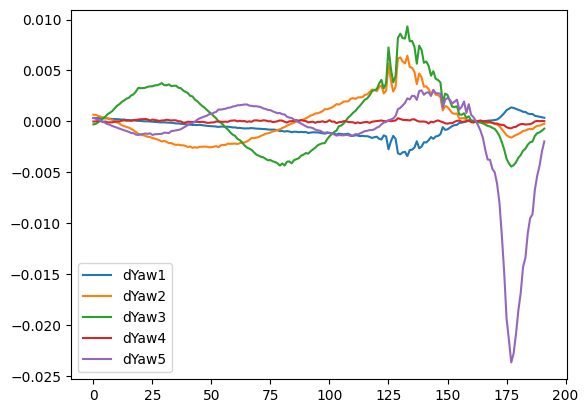

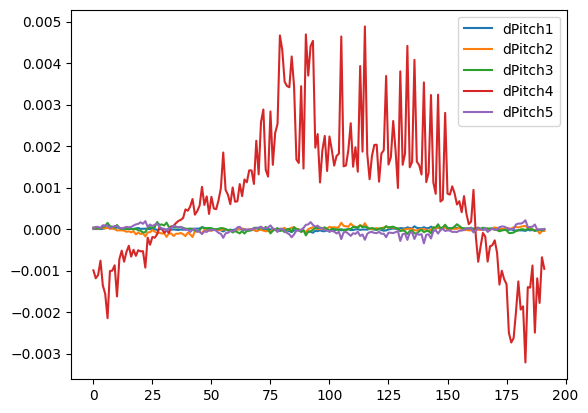

In [11]:
plt.plot(dYaw1, label="dYaw1")
plt.plot(dYaw2, label="dYaw2")
plt.plot(dYaw3, label="dYaw3")
plt.plot(dYaw4, label="dYaw4")
plt.plot(dYaw5, label="dYaw5")
plt.legend()
plt.show()
plt.plot(dPitch1, label="dPitch1")
plt.plot(dPitch2, label="dPitch2")
plt.plot(dPitch3, label="dPitch3")
plt.plot(dPitch4, label="dPitch4")
plt.plot(dPitch5, label="dPitch5")
plt.legend()
plt.show()

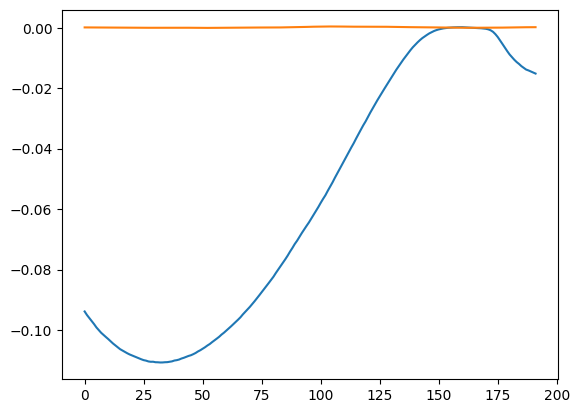

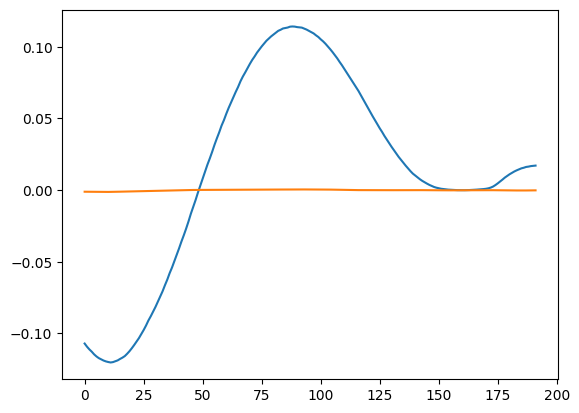

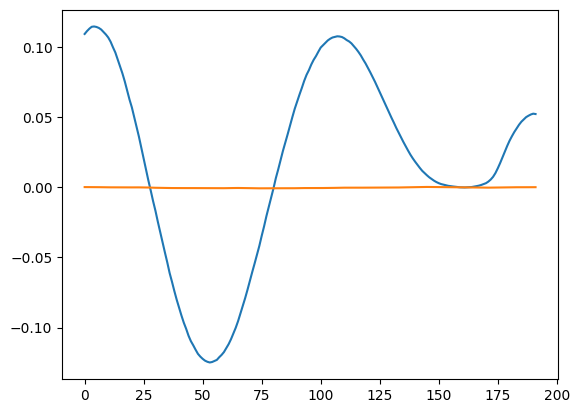

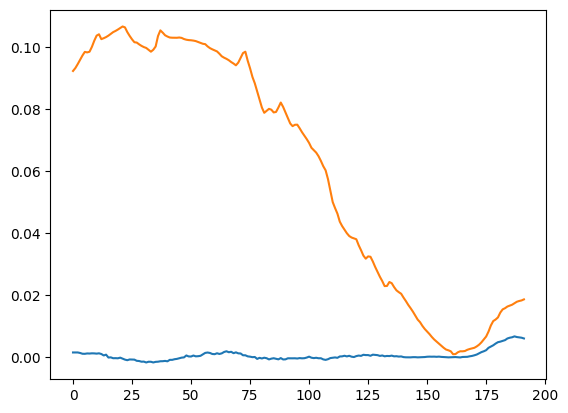

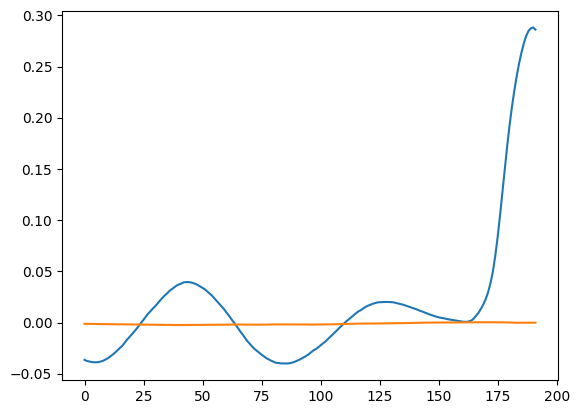

In [12]:
plt.plot(ctvYaw1)
plt.plot(ctvPitch1)
plt.show()
plt.plot(ctvYaw2)
plt.plot(ctvPitch2)
plt.show()
plt.plot(ctvYaw3)
plt.plot(ctvPitch3)
plt.show()
plt.plot(ctvYaw4)
plt.plot(ctvPitch4)
plt.show()
plt.plot(ctvYaw5)
plt.plot(ctvPitch5)
plt.show()

In [13]:
X_train, X_test = pca.transform(X_train), pca.transform(X_test)

In [14]:
X_train, X_test = pd.DataFrame(X_train), pd.DataFrame(X_test) 
if INCLUDE_FIRING:
    X_train = pd.concat([X_train, X_train_firing], axis=1).to_numpy()
    X_test = pd.concat([X_test, X_test_firing], axis=1).to_numpy()
else:
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()

In [15]:
pickle.dump(X_train, open('./data/X_train.pckl', 'wb'))
pickle.dump(X_test, open('./data/X_test.pckl', 'wb'))
pickle.dump(y_train, open('./data/y_train.pckl', 'wb'))
pickle.dump(y_test, open('./data/y_test.pckl', 'wb'))